# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Adm\Desktop\EBAC_ex\tabela_encoded.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  sexo_M                                  16650 non-null  in

In [4]:
df['mau'] = df.mau.astype(int)
df['mau'].unique()

#False = 0, True = 1

array([0, 1])

In [5]:
df.rename({'sexo_M':'sexo'}, axis=1, inplace=True);
#1 = Masculino, 0 = Feminino

In [6]:
del df['Unnamed: 0']

In [7]:
df.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int32
sexo                                        int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [8]:
y = df.mau
X = df.drop('mau', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
def accuracy(TruePositives:int, TrueNegatives:int, _all:int) -> int:
    return print(
        f'Accuracy: {round((TruePositives+TrueNegatives)*100/_all,2)}%'
    )

In [11]:
#1
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [12]:
#2
clf_trained = clf.fit(X_train, y_train) #Treinado

clf_trained

DecisionTreeClassifier(random_state=100)

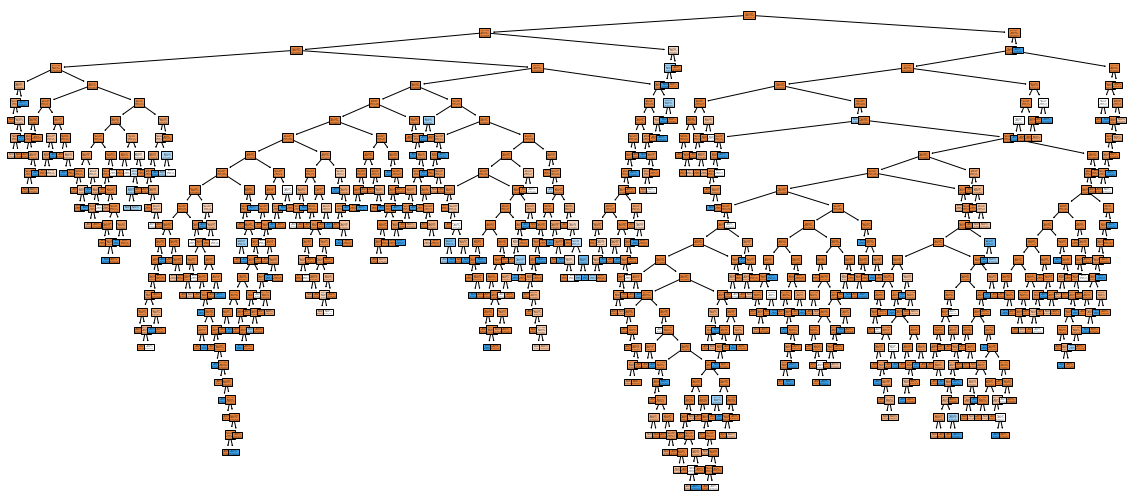

In [13]:
#3
plt.figure(figsize=(20, 9))
plot_tree(clf_trained,
          filled=True,
          class_names=['Aprovados', 'Reprovados']);

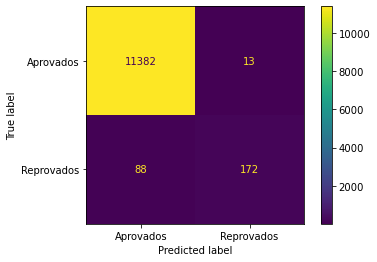

In [14]:
#4
ConfusionMatrixDisplay.from_estimator(clf_trained, X_train, y_train, display_labels=["Aprovados","Reprovados"]);

In [15]:
#5
X_train.shape[0]

11655

In [16]:
accuracy(11382,172,11655)

Accuracy: 99.13%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [17]:
#1
prediction = clf_trained.predict(X_test)

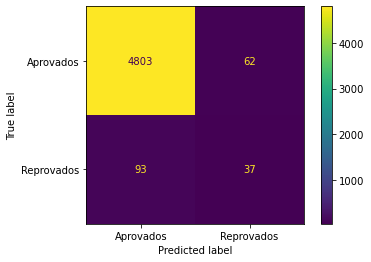

In [18]:
#2
ConfusionMatrixDisplay.from_predictions(y_test, prediction, display_labels=['Aprovados', 'Reprovados']);

In [19]:
#3
accuracy_score(y_test, prediction)

0.968968968968969

In [20]:
#4
clf_= DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf_ = clf_.fit(X_train, y_train)

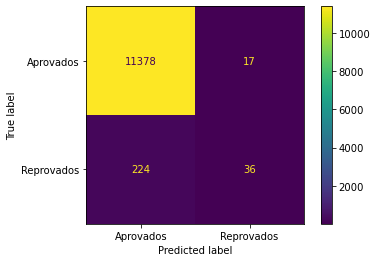

In [21]:
ConfusionMatrixDisplay.from_estimator(clf_, X_train, y_train, display_labels=["Aprovados","Reprovados"]);

In [22]:
#Qual a proporção de proponentes foram classificados como 'maus'?
print(f'{round((17 / (17 + 36))*100,1)}%')

32.1%


In [24]:
#5
#Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
accuracy(11378,0,11655)

Accuracy: 97.62%
